<a href="https://colab.research.google.com/github/mdepasquale1023/EG-App/blob/main/EG_APP_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv
df_downloads = pd.read_csv('/content/drive/MyDrive/EasternGateApp/app-downloads-month.csv')

df_launches = pd.read_csv('/content/drive/MyDrive/EasternGateApp/app-launches-month.csv')

df_impressions = pd.read_csv('/content/drive/MyDrive/EasternGateApp/impressions-month.csv')

In [3]:
# Rename columns to specify downloads in df_downloads and drop columns with '0' values
df_downloads.rename(columns={'total': 'total_downloads',
                             'ios': 'ios_downloads',
                             'android': 'android_downloads',
                             'apple_tv': 'apple_tv_downloads',
                             'roku': 'roku_downloads'}, inplace=True)

df_downloads.drop(columns=['fire_tv', 'google_tv', 'car_play', 'android_auto'], inplace=True)

df_downloads.head()

,date,total_downloads,ios_downloads,android_downloads,apple_tv_downloads,roku_downloads
0,2023-01-01,110,38,25,6,41
1,2023-02-01,96,31,22,6,37
2,2023-03-01,105,45,19,4,37
3,2023-04-01,103,55,18,4,26
4,2023-05-01,170,108,13,13,36


In [4]:
# Rename columns to specify launches in df_launches and drop columns with '0' values
df_launches.rename(columns={'total': 'total_launches',
                             'ios': 'ios_launches',
                             'android': 'android_launches',
                             'apple_tv': 'apple_tv_launches',
                             'roku': 'roku_launches'}, inplace=True)

df_launches.drop(columns=['fire_tv', 'google_tv', 'car_play', 'android_auto'], inplace=True)

df_launches.head()

,date,total_launches,ios_launches,android_launches,apple_tv_launches,roku_launches
0,2023-01-01,1939,1209,523,8,199
1,2023-02-01,1977,1261,518,7,191
2,2023-03-01,1604,952,396,8,248
3,2023-04-01,1771,1167,414,9,181
4,2023-05-01,2645,1774,617,15,239


In [ ]:
# Rename columns to specify impressions in df_impressions and drop columns with '0' values
df_impressions.rename(columns={'total': 'total_impressions',
                             'ios': 'ios_impressions',
                             'android': 'android_impressions',
                             'apple_tv': 'apple_tv_impressions',
                             'roku': 'roku_impressions'}, inplace=True)

df_impressions.drop(columns=['fire_tv', 'google_tv', 'car_play', 'android_auto'], inplace=True)

df_impressions.head()

In [6]:
# Merge df_downloads df_launches and df_impressions

df_combined = pd.merge(df_downloads, df_launches, on='date', how='left')
df_combined = pd.merge(df_combined, df_impressions, on='date', how='left')

df_combined.head()

,date,total_downloads,ios_downloads,android_downloads,apple_tv_downloads,roku_downloads,total_launches,ios_launches,android_launches,apple_tv_launches,roku_launches,total_impressions,ios_impressions,android_impressions,apple_tv_impressions,roku_impressions
0,2023-01-01,110,38,25,6,41,1939,1209,523,8,199,12257,8748,2644,36,829
1,2023-02-01,96,31,22,6,37,1977,1261,518,7,191,14254,10872,2644,43,695
2,2023-03-01,105,45,19,4,37,1604,952,396,8,248,10779,7499,1980,13,1287
3,2023-04-01,103,55,18,4,26,1771,1167,414,9,181,11885,9280,2009,21,575
4,2023-05-01,170,108,13,13,36,2645,1774,617,15,239,16904,13130,2928,76,770


In [7]:
# 'date' in datetime format

df_combined['date'] = pd.to_datetime(df_combined['date'])
df_combined['month'] = df_combined['date'].dt.strftime('%m')
df_combined['date'].dtype

dtype('<M8[ns]')

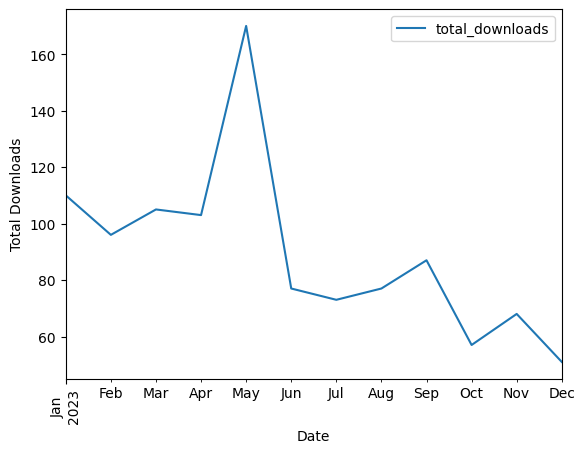

In [9]:
# Total Downloads over time

df_combined.plot.line(x='date', y='total_downloads')
plt.xlabel('Date')
plt.ylabel('Total Downloads')
_ = plt.xticks(rotation='vertical')

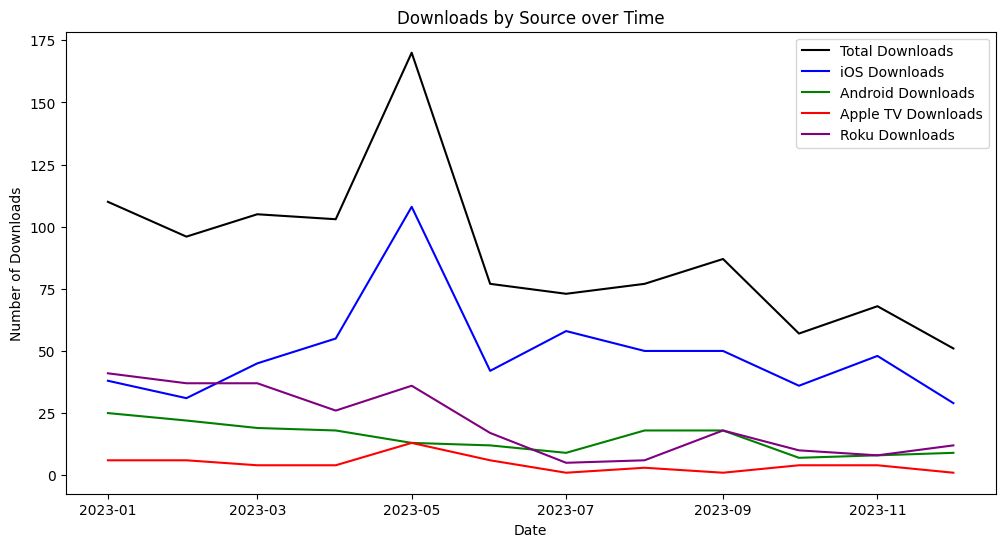

In [11]:
# Downloads by source over time

plt.figure(figsize=(12, 6))

date = df_combined["date"]
total_downloads = df_combined["total_downloads"]
ios_downloads = df_combined["ios_downloads"]
android_downloads = df_combined["android_downloads"]
apple_tv_downloads = df_combined["apple_tv_downloads"]
roku_downloads = df_combined["roku_downloads"]

plt.plot(date, total_downloads, label="Total Downloads", color="black")
plt.plot(date, ios_downloads, label="iOS Downloads", color="blue")
plt.plot(date, android_downloads, label="Android Downloads", color="green")
plt.plot(date, apple_tv_downloads, label="Apple TV Downloads", color="red")
plt.plot(date, roku_downloads, label="Roku Downloads", color="purple")

plt.xlabel("Date")
plt.ylabel("Number of Downloads")
plt.title("Downloads by Source over Time")
_ = plt.legend()

In [12]:
# Calculate month-over-month percentage change for downloads, launches, and impressions
df_combined['downloads_pct_change'] = df_combined['total_downloads'].pct_change() * 100
df_combined['launches_pct_change'] = df_combined['total_launches'].pct_change() * 100
df_combined['impressions_pct_change'] = df_combined['total_impressions'].pct_change() * 100


# Conversion rate from impressions to downloads
df_combined['impressions_to_downloads'] = (df_combined['total_downloads'] / df_combined['total_impressions']) * 100

# Conversion rate from downloads to launches
df_combined['downloads_to_launches'] = (df_combined['total_launches'] / df_combined['total_downloads']) * 100

In [17]:
# Average Page Views per Launch (Impressions per Launch)
df_combined['page_views_per_launch'] = df_combined['total_impressions'] / df_combined['total_launches']

# New conversion rate: from launches to page views (impressions in context)
df_combined['launches_to_page_views'] = (df_combined['total_impressions'] / df_combined['total_launches']) * 100

# Summary statistics for key metrics
summary = {
    'Average Downloads': df_combined['total_downloads'].mean(),
    'Average Launches': df_combined['total_launches'].mean(),
    'Average Page Views (Impressions)': df_combined['total_impressions'].mean(),
    'Average Page Views per Launch': df_combined['page_views_per_launch'].mean(),
    'Average Conversion Rate Launches to Page Views (%)': df_combined['launches_to_page_views'].mean()
}

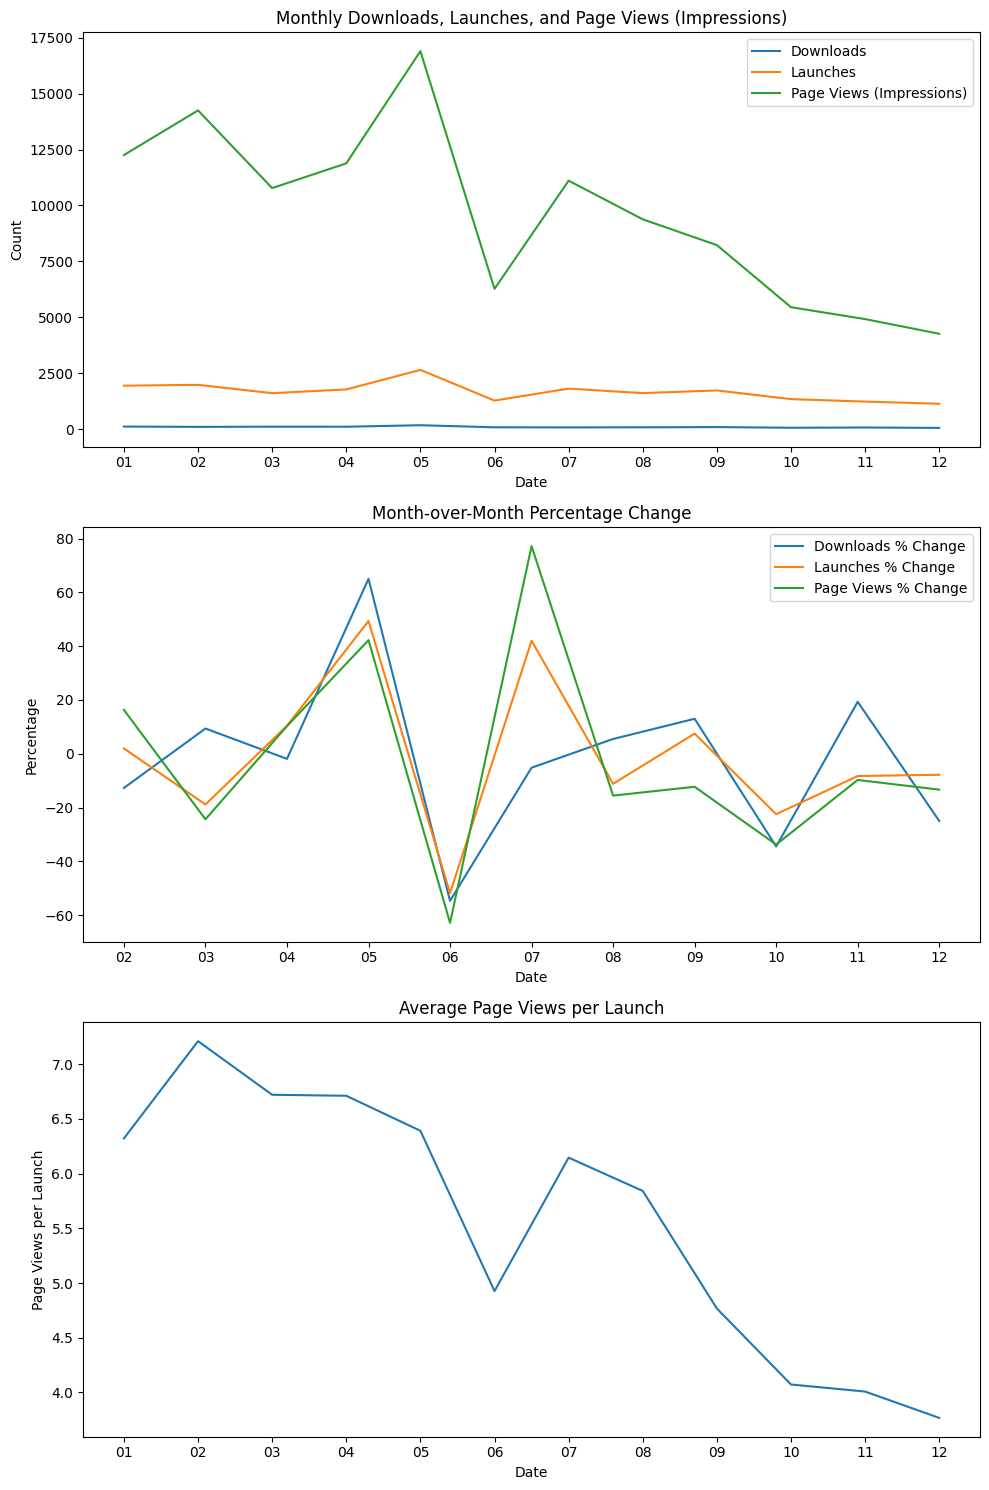

{'Average Downloads': 89.5,
 'Average Launches': 1670.4166666666667,
 'Average Page Views (Impressions)': 9641.5,
 'Average Page Views per Launch': 5.5734297023746855,
 'Average Conversion Rate Launches to Page Views (%)': 557.3429702374685}

In [18]:
# Create visualizations
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Downloads, Launches, and Page Views (Impressions)
sns.lineplot(x='month', y='total_downloads', data=df_combined, ax=ax[0], label='Downloads')
sns.lineplot(x='month', y='total_launches', data=df_combined, ax=ax[0], label='Launches')
sns.lineplot(x='month', y='total_impressions', data=df_combined, ax=ax[0], label='Page Views (Impressions)')
ax[0].set_title('Monthly Downloads, Launches, and Page Views (Impressions)')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Date')
ax[0].legend()

# Plot for Month-over-Month Percentage Change (No change, just for consistency)
sns.lineplot(x='month', y='downloads_pct_change', data=df_combined, ax=ax[1], label='Downloads % Change')
sns.lineplot(x='month', y='launches_pct_change', data=df_combined, ax=ax[1], label='Launches % Change')
sns.lineplot(x='month', y='impressions_pct_change', data=df_combined, ax=ax[1], label='Page Views % Change')
ax[1].set_title('Month-over-Month Percentage Change')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Date')
ax[1].legend()

# Plot for Average Page Views per Launch
sns.lineplot(x='month', y='page_views_per_launch', data=df_combined, ax=ax[2])
ax[2].set_title('Average Page Views per Launch')
ax[2].set_ylabel('Page Views per Launch')
ax[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

summary

- Monthly Downloads, Launches, and Page Views (Impressions): This chart shows the monthly counts for downloads, launches, and page views. It helps in understanding the overall user acquisition and engagement trends.

- Month-over-Month Percentage Change: This graph depicts the percentage change from one month to the next for each metric, offering insights into the growth or decline trends.

- Average Page Views per Launch: The final chart shows the average number of pages a user views each time they launch the app, providing an indicator of user engagement depth.

1. General Trends: The data shows that the app has an average of about 89.5 downloads per month. This indicates a consistent interest from new users. The app isn't just sitting unused on users' devices; it's being opened frequently, with an average of 1670.4 launches per month. Furthermore, users are not just opening the app; they're engaging with it, shown by an average of 9641.5 page views (impressions) per month. This activity demonstrates that the app is not only attracting users but also retaining their attention through interactive content or features.

2. User Engagement: On average, there are about 5.57 page views per launch. This metric suggests that once users open the app, they don't just look at one page and leave; they browse through about 5 to 6 pages each time. This level of engagement is a positive sign that users find the app's content compelling and valuable, prompting them to explore more than just the landing page or the initial screen they encounter.

3. Month-over-Month Changes: While the average figures provide a snapshot, the month-over-month changes reveal the dynamics over time. For example, if you notice a particular month where downloads spiked or dropped significantly, it could indicate the impact of marketing campaigns, seasonality, or changes in user preferences. Similarly, fluctuations in launches and page views can help identify when users became more or less active and what content or features might be influencing these changes. These trends are crucial for understanding not just the static picture but how the app's usage evolves over time.